## Imports

In [3]:
import os

import matplotlib.pyplot as plt

from analysis import load_experiment_results, process_exp_results_to_df

## Load experimental data

In [12]:
exp_results = []
for exp in sorted([f for f in os.listdir("sacred") if not f.startswith("_")]):
    path = os.path.join("sacred", exp)
    exp_results.append(load_experiment_results(path))

exp_df = process_exp_results_to_df(exp_results)
exp_df.sort_values("average")

,average,method,min,num_repeats,repeat,status
5,1.2,sol_repeat_random_half,1,10000.0,10,COMPLETED
4,13.6,sol_repeat_random_half,3,1000.0,10,COMPLETED
3,69.0,sol_repeat_random_half,3,100.0,10,COMPLETED
6,119.0,sol_sort_greedy,119,NaN,10,COMPLETED
7,196.2,sol_repeat_random_half,5,50.0,10,COMPLETED
2,845.6,sol_repeat_random_half,91,10.0,10,COMPLETED
0,9271.6,sol_random,455,NaN,10,COMPLETED
1,10373.0,sol_random_half,3597,NaN,10,COMPLETED


## Create plots

Text(0.5, 1.0, 'Average result by method')

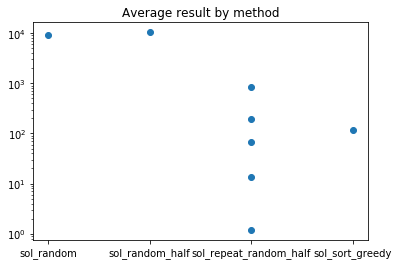

In [14]:
plt.scatter(exp_df["method"], exp_df["average"])
plt.yscale("log")
plt.title("Average result by method")

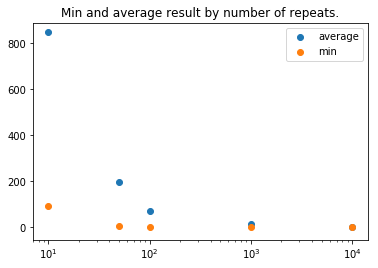

In [13]:
selected = exp_df[ exp_df["method"] == "sol_repeat_random_half" ]

plt.scatter(selected["num_repeats"], selected["average"], label="average")
plt.scatter(selected["num_repeats"], selected["min"], label="min")

plt.title("Min and average result by number of repeats.")
plt.xscale("log")
plt.legend()